# 房价预测

从给定的房屋基本信息以及房屋销售信息等，建立一个回归模型预测房屋的销售价格。

## 数据

数据主要包括2014年5月至2015年5月美国King County的房屋销售价格以及房屋的基本信息。 数据分为训练数据和测试数据，分别保存在 kc_train.csv 和 kc_test.csv 两个文件中。其中训练数据主要包括10000条记录，14个字段，主要字段说明如下： 

- 第一列“销售日期”：2014年5月到2015年5月房屋出售时的日期 
- 第二列“销售价格”：房屋交易价格，单位为美元，是目标预测值 
- 第三列“卧室数”：房屋中的卧室数目 
- 第四列“浴室数”：房屋中的浴室数目 
- 第五列“房屋面积”：房屋里的生活面积 
- 第六列“停车面积”：停车坪的面积 
- 第七列“楼层数”：房屋的楼层数 
- 第八列“房屋评分”：King County房屋评分系统对房屋的总体评分 
- 第九列“建筑面积”：除了地下室之外的房屋建筑面积 
- 第十列“地下室面积”：地下室的面积 
- 第十一列“建筑年份”：房屋建成的年份 
- 第十二列“修复年份”：房屋上次修复的年份 
- 第十三列"纬度"：房屋所在纬度 
- 第十四列“经度”：房屋所在经度

测试数据主要包括3000条记录，13个字段，跟训练数据的不同是测试数据并不包括房屋销售价格，学员需要通过由训练数据所建立的模型以及所给的测试数据，得出测试数据相应的房屋销售价格预测值。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# 系统库
import os, sys

# 自带数据
datalib_path = os.path.join(os.path.abspath('.'), '../../../../')
sys.path.append(datalib_path)
import dataset

## Load Data

In [2]:
X_train = pd.read_csv(os.path.join(dataset.house_path,'kc_train.csv'))
y_train = pd.read_csv(os.path.join(dataset.house_path,'kc_train2.csv'))  # 销售价格
X_test = pd.read_csv(os.path.join(dataset.house_path,'kc_test.csv'))  # 测试数据

## Explore Data

In [3]:
X_train.info()    # 查看是否有缺失值

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   20150302  9999 non-null   int64  
 1   3         9999 non-null   int64  
 2   2.25      9999 non-null   float64
 3   1670      9999 non-null   int64  
 4   6240      9999 non-null   int64  
 5   1         9999 non-null   float64
 6   8         9999 non-null   int64  
 7   1240      9999 non-null   int64  
 8   430       9999 non-null   int64  
 9   1974      9999 non-null   int64  
 10  0         9999 non-null   int64  
 11  47.6413   9999 non-null   float64
 12  -122.113  9999 non-null   float64
dtypes: float64(4), int64(9)
memory usage: 1015.6 KB


## Preprocess Data

In [4]:
minMaxScaler = MinMaxScaler()
minMaxScaler.fit(X_train)   # 进行内部拟合，内部参数会发生变化
X_train_scaled = minMaxScaler.transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
minMaxScaler2 = MinMaxScaler()
minMaxScaler2.fit(X_test)
X_test_scaled = minMaxScaler2.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

## Train

In [5]:
linearRegressor = LinearRegression()
linearRegressor.fit(X_train_scaled, y_train)

LinearRegression()

## Performance Evaluation

In [6]:
y_train_predict = linearRegressor.predict(X_train_scaled)   # 输入数据进行预测得到结果
mse = mean_squared_error(y_train_predict, y_train)   # 使用均方误差来评价模型好坏，可以输出mse进行查看评价值

## Figure

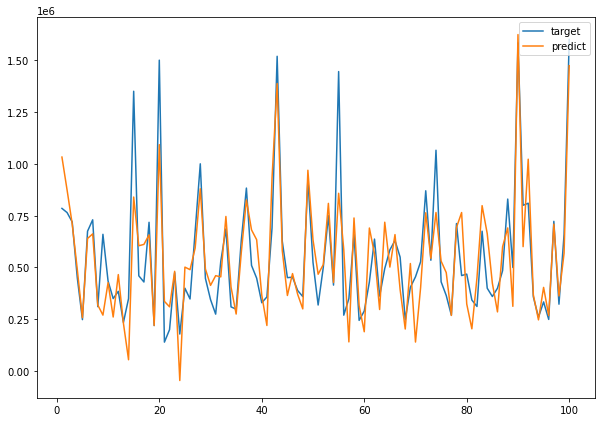

In [7]:
plot.figure(figsize=(10, 7))  # 画布大小
num = 100
x = np.arange(1, num+1)  # 取100个点进行比较
plot.plot(x, y_train[:num], label='target')  # 目标取值
plot.plot(x, y_train_predict[:num], label='predict')  # 预测取值
plot.legend(loc='upper right')  # 线条显示位置
plot.show()